# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM

In [35]:
import numpy as np
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns

# <h2>1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)</h3>

In [36]:
# Выгрузка датасета из файла, загруженного в Githab
data = pd.read_csv('https://raw.githubusercontent.com/KnightRem/Homework/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## <h2>2. Проведите первичный анализ.</h2>

In [37]:
# размер таблицы
data.shape

(48842, 15)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [39]:
data.describe()#(include = "all")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
# список столбцов
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [41]:
# количество уникальных значений
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [42]:
# просмотр уникальных значений кроме 'fnlwgt'
data2=data.drop('fnlwgt', axis=1)
for col in data2:
    print(col,data2[col].unique())

age [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationsh

In [43]:
# значения целевой функции
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [44]:
# количество значений целевой функции
len(data['income'].unique())

2

In [45]:
# частота значений на примере Страны
data['native-country'].value_counts().head(10)

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native-country, dtype: int64

In [46]:
# анализ крайних значений на примере Возраста
data.sort_values(by = 'age').tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12446,90,Private,347074,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1944,12,United-States,<=50K
19172,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
8982,90,Private,225063,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
28277,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
899,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K


# <h2>3. Проверьте данные на пропуски. Удалите в случае обнаружения.</h2> 

In [47]:
# проверяем наличие отсутствующих, ? , отрицательных значений
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [48]:
data[data == 0].count()

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44807
capital-loss       46560
hours-per-week         0
native-country         0
income                 0
dtype: int64

In [49]:
# поиск отрицательных значений
data[data.select_dtypes(include=['float64', 'int64'])<0].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [50]:
# поиск данных со значением '?'
data[data =='?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [51]:
# Заменяем пропуски '?' на NaN
data = data.replace('?', np.nan)#, regex=True)
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [52]:
# заменяем отсутствующие значения Модой
cols = list(data)#["workclass", "native-country"]
data[cols]=data[cols].fillna(data.mode().iloc[0])
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# <h2>4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).</h2>

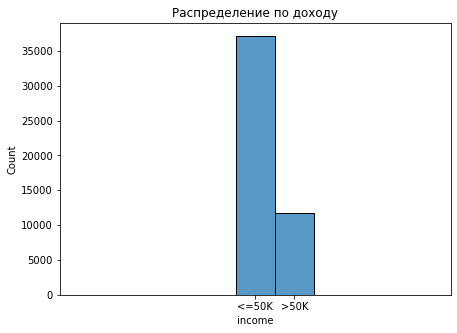

In [53]:
# распределение данных по доходу
plt.figure(figsize=(7, 5))
sns.histplot(data['income'], bins=2).set_title('Распределение по доходу')
plt.xlim(-5, 5)
plt.show()

Text(0.5, 1.0, 'Распределение по доходу, полу и занятости')

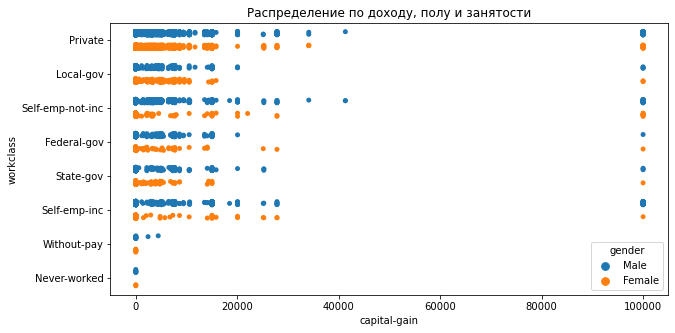

In [54]:
# распределение по 3 признакам
from itertools import count
plt.figure(figsize=(10, 5))
sns.stripplot(x = 'capital-gain' , y = 'workclass' , data = data, jitter = True, hue = 'gender' , dodge = True ).set_title('Распределение по доходу, полу и занятости')

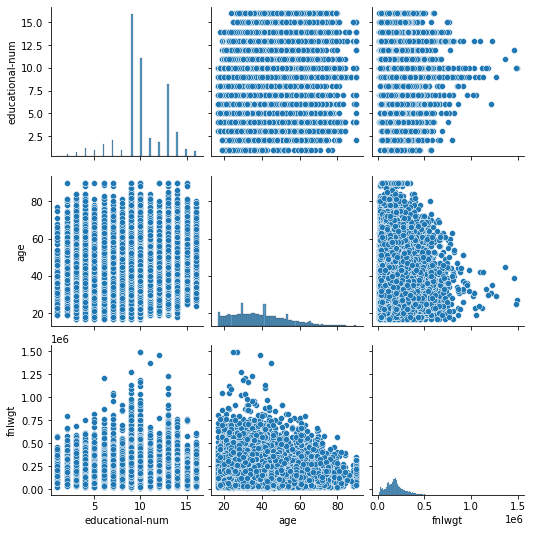

In [55]:
# формируем парные графики для 3 переменных
sns.pairplot(data[['educational-num','age','fnlwgt']])

# <h2>5. Преобразуйте категориальные признаки.</h2>

<div class="alert alert-info"><p> Используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения.</p></div>

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
# выделяем категориальные столбцы

data.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [58]:
# переведем данные этих столбцов в значения 0 и 1 -  добавив столбцы с соответствующими названиями
X = pd.get_dummies( data, columns = [ 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country'] )
# столбец income является целевой переменной, удаляем его из данных
del X['income']
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [59]:
X.shape

(48842, 105)

In [60]:
# задаем целевую переменную
y = data.loc[ :, ['income'] ]
y.head()

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K


In [61]:

# записываем в таргетную переменную y преобразованный столбец income
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [62]:
# записываем в переменную y преобразованный столбец income
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

# <h2>6. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.</h2>

In [63]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# <h2>7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.</h2>
# <h2>Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.</h2>
# <h3>7.1. Логистическая регрессия.</h3>

In [64]:
# используем в качестве модели логистическую регресиию из scikit-learn
model = LogisticRegression()

In [65]:
# обучаем модель
model.fit( X, y )
predictions = model.predict_proba( X )

c:\Users\okho004\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
# разделям выборку на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [68]:
# смотрим как выглядят наши предсказания
predictions[:5] 

array([[0.82095411, 0.17904589],
       [0.76007807, 0.23992193],
       [0.86432688, 0.13567312],
       [0.19177108, 0.80822892],
       [0.72445885, 0.27554115]])

In [69]:
# получаем массив предсказаний
model.predict(X_test) 

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
# и вероятность предсказаний
model.predict_proba(X_test)

array([[0.68104681, 0.31895319],
       [0.75242555, 0.24757445],
       [0.02638697, 0.97361303],
       ...,
       [0.78073763, 0.21926237],
       [0.7449344 , 0.2550656 ],
       [0.77098571, 0.22901429]])

<p>Получаем наш Скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [71]:
model.score(X_train, y_train) 

0.7967394364394851

In [72]:
model.score(X_test,y_test)

0.8036646534957519

# <h3>7.2. Метод опорных векторов.</h3>

In [73]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

<p>Получаем наш Скор для обучающей и тестовой выборок.</p>

In [74]:
clf.score(X_train, y_train)

0.8611317277915697

In [75]:
clf.score(X_test, y_test)

0.8549493295117208

<p>Без StandardScaler получаем более худший результат на тестовой выборке:</p>

In [76]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [77]:
svc.score(X_train, y_train)

0.9549561077982238

In [78]:
svc.score(X_test, y_test)

0.764459002968574

# <h2>8. Сформулируйте выводы по проделанной работе.</h2>
# <h3> Метод опорных векторов показал лучшие результаты, чем метод логистической регрессии как на стадии обучения так и на тестовой выборке, поэтому при выборе итоговой модели следует предпочесть его. </h3>

# <h2>9. Кратко опишите какие преобразования были сделаны с данными.</h2>
# <h3> Данные были проанализированы на предмет отсутствия значений, оценки уникальных значений (выбросов), отрицательных значений. Данные со значением "?" заменены на Моду. Как вариант - можно было обнулить такие значения. Затем категориальные переменные были преобразованы в числовые с помощью one hot кодирования. Наибольшее количество преобразований пришлось на поле fnlwg. </h3>

# <h2>10. Сравните точность двух моделей.</h2>
# <h3> Точность метод опорных векторов на стадии обучения-86%, на тестовой выборке-85%, логистическая регрессия на стадии обучения-79%, на тестовой выборке-80%.  </h3>

# <h2>11. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат?</h2>
# <h3> Для повышения точности возможны следующие дополнительные подходы: учет различных вариантов разбиения на обучающую и тестовую выборку; замена пропусков на 0, средние значения или их удаление;  уменьшение количества переменных и их уточнение, например, роль capital-gain; анализ возможных выбросов. В частности следует отметить, что LR более чувствителен к выбросам, чем SVM. Поскольку SVM учитывает в основном точки, ближайшие к границе решения.</h3>